In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

from scipy import special
from numpy import arange
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline




In [25]:
df_deaths= pd.read_csv('police_deaths.csv',delimiter=',',low_memory=False, encoding = 'latin-1')

df_deaths

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Cause of Death: Gunfire,Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Cause of Death: Gunfire,Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Cause of Death: Gunfire,Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Cause of Death: Gunfire,Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC
5,High Sheriff John Caldwell Cook,"Mecklenburg County Sheriff's Office, NC","EOW: Tuesday, October 16, 1804",Cause of Death: Gunfire,Gunfire,1804-10-16,1804,False,Mecklenburg County Sheriff's Office,NC
6,Watchman Christian Luswanger,"New York City Watch, NY","EOW: Thursday, December 25, 1806",Cause of Death: Stabbed,Stabbed,1806-12-25,1806,False,New York City Watch,NY
7,Deputy Sheriff John A. Gooch,"Livingston County Sheriff's Department, KY","EOW: Saturday, March 7, 1807",Cause of Death: Gunfire,Gunfire,1807-03-07,1807,False,Livingston County Sheriff's Department,KY
8,Deputy Sheriff Ebenezer Parker,"Cumberland County Sheriff's Office, ME","EOW: Monday, January 18, 1808",Cause of Death: Assault,Assault,1808-01-18,1808,False,Cumberland County Sheriff's Office,ME
9,Night Watchman George Workner,"Baltimore City Police Department, MD","EOW: Tuesday, March 15, 1808",Cause of Death: Stabbed,Stabbed,1808-03-15,1808,False,Baltimore City Police Department,MD


In [26]:
#df_pl= pd.read_csv('D:\Cardiff University 2017-2018\Visualization\Coursework_2\police_deaths.csv',delimiter=',',low_memory=False, encoding = 'latin-1', usecols=['person','cause_short','date','year','state'])

#df_pl.columns= ['person','cause_short','date','year','state']
#df_pl

In [27]:
df_deaths['cause_short'].value_counts()

Gunfire                     12067
Automobile accident          2348
Motorcycle accident          1134
Heart attack                  977
Vehicular assault             888
Struck by vehicle             868
Vehicle pursuit               627
Assault                       613
Gunfire (Accidental)          604
Stabbed                       465
Aircraft accident             381
Drowned                       262
Struck by train               254
Fall                          197
Duty related illness          169
9/11 related illness          110
Terrorist attack               85
Electrocuted                   83
Animal related                 82
Accidental                     80
Struck by streetcar            68
Fire                           63
Heat exhaustion                61
Explosion                      58
Bomb                           57
Exposure to toxins             44
Weather/Natural disaster       33
Training accident              28
Structure collapse             23
Train accident

In [29]:
#I have separated the police deaths cause into the 15 top groups to make it easier for the user to read it
#when the data is vissualized on tableau (police_deaths_by_year_cause.twb)


df_newD= pd.read_csv('police_deaths.csv',delimiter=',',low_memory=False, encoding = 'latin-1')


df_deaths = df_newD

#36 unique causes narrow them down to 14
def causes_groups(series):
    if series == 'Gunfire':
        return 'Gunfire'
    elif series == 'Automobile accident':
        return 'Automobile accident'
    elif series == 'Motorcycle accident':
        return 'Motorcycle Accident'
    elif series == 'Heart attack':
        return 'Heart Attack'
    elif series == 'Vehicular assault':
        return 'Vehicular Assault'
    elif series == 'Struck by vehicle':
        return 'Struck by Vehicle'
    elif series == 'Vehicle pursuit':
        return 'Vehicle Pursuit'
    elif series == 'Assault':
        return 'Assault'
    elif series == 'Gunfire (Accidental)':
        return 'Gunfire Accidental'
    elif series == 'Stabbed':
        return 'Stabbed'
    elif series == 'Aircraft accident':
        return 'Aircraft accident'
    elif series == 'Drowned':
        return 'Drowned'
    elif series == '9/11 related illness':
        return 'Terrorist attack'
    elif series == 'Terrorist attack':
        return 'Terrorist attack'
    else:
        return 'Other'
    
    
    
    
    
df_newD['cause_short'] = df_deaths['cause_short'].apply(causes_groups)
        
df_newD['cause_short'].value_counts()

Gunfire                12067
Automobile accident     2348
Other                   1371
Motorcycle Accident     1134
Heart Attack             977
Vehicular Assault        888
Struck by Vehicle        868
Vehicle Pursuit          627
Assault                  613
Gunfire Accidental       604
Stabbed                  465
Aircraft accident        381
Drowned                  262
Terrorist attack         195
Name: cause_short, dtype: int64

In [30]:
#Create the new csv to use for the vissualization of the police_deaths by cause throughout the years

#remove unnecessary columns/variables
var_date = df_newD.pop('date')
var_eow = df_newD.pop('eow')
var_dept_name = df_newD.pop('dept_name')


df_newD.to_csv('cause_deaths.csv')

In [31]:
def year_groups(series):
    if series < 1836:
        return "1791 - 1835"
    elif 1836 <= series < 1881:
        return "1836 - 1880"
    elif 1881 <= series < 1926:
        return "1881 - 1925"
    elif 1926 <= series < 1971:
        return "1926 - 1970"
    elif 1971 <= series < 2017:
        return "1971 - 2016"
    
df_newD['year'] = df_deaths['year'].apply(year_groups)

df_newD['year'].value_counts()


1971 - 2016    8643
1926 - 1970    7898
1881 - 1925    5541
1836 - 1880     688
1791 - 1835      30
Name: year, dtype: int64

In [34]:
df_pl= pd.read_csv('police_deaths.csv',delimiter=',',low_memory=False, encoding = 'latin-1', usecols=['person','year','state'])

df_pl.columns= ['person','year','state']
df_pl['year'] = df_pl['year'].apply(year_groups)
otto = df_pl.groupby(['year','state']).agg({'person':'count'})


In [35]:

otto.to_csv('state_yearD.csv')


In [36]:
df_pl

,person,year,state
0,Constable Darius Quimby,1791 - 1835,NY
1,Sheriff Cornelius Hogeboom,1791 - 1835,NY
2,Deputy Sheriff Isaac Smith,1791 - 1835,NY
3,Marshal Robert Forsyth,1791 - 1835,US
4,Sheriff Robert Maxwell,1791 - 1835,SC
5,High Sheriff John Caldwell Cook,1791 - 1835,NC
6,Watchman Christian Luswanger,1791 - 1835,NY
7,Deputy Sheriff John A. Gooch,1791 - 1835,KY
8,Deputy Sheriff Ebenezer Parker,1791 - 1835,ME
9,Night Watchman George Workner,1791 - 1835,MD


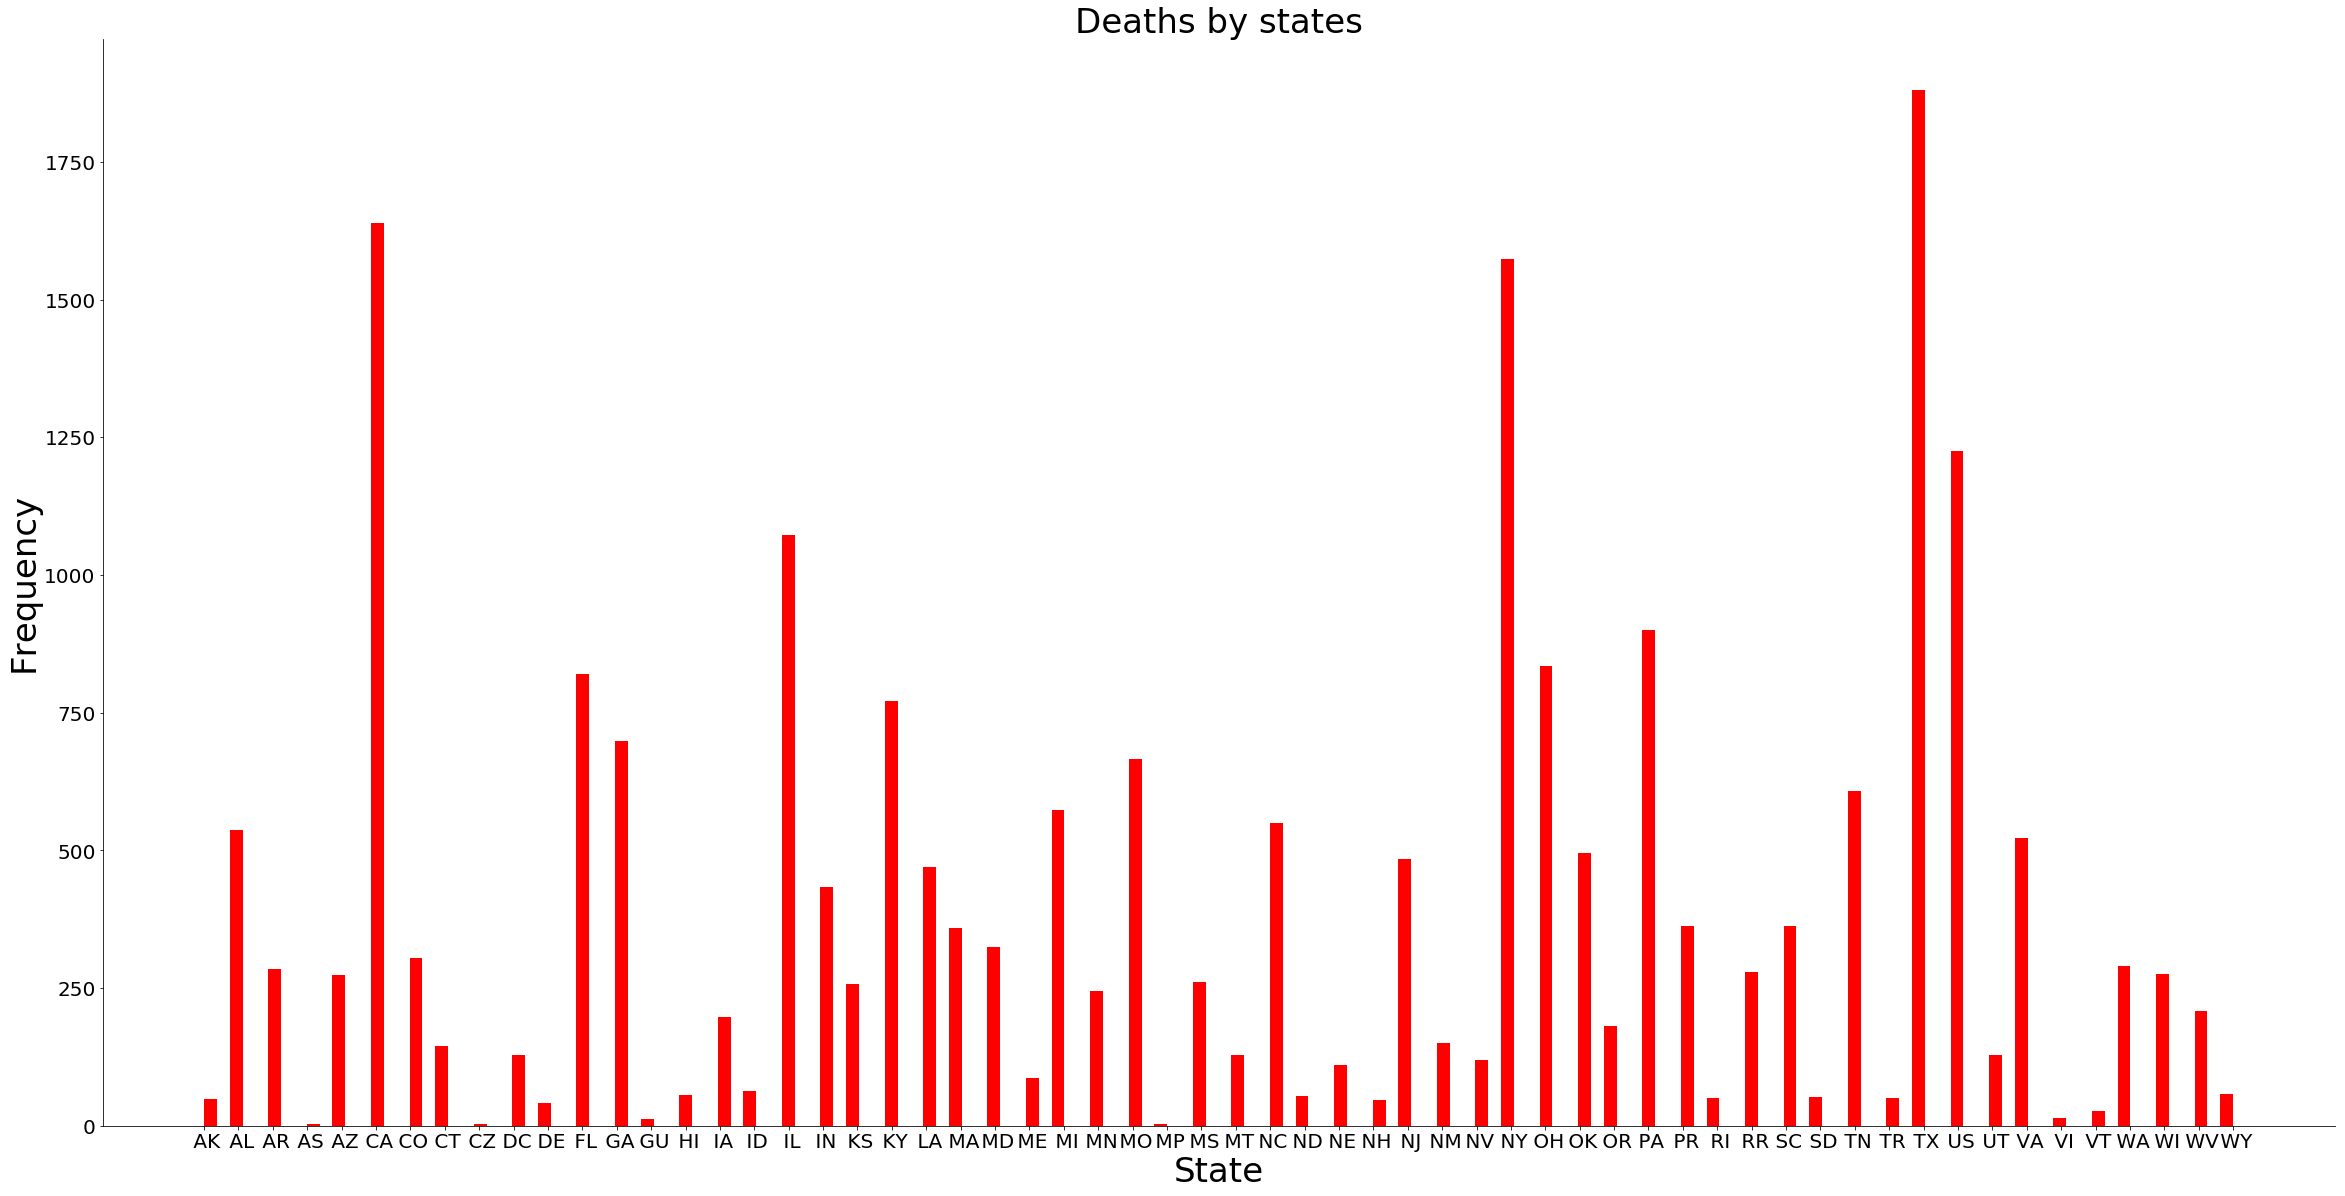

In [37]:
fig = plt.figure(figsize=(40, 20))
ax = plt.subplot(111)
ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()

plt.xticks(fontsize=20)  
plt.yticks(fontsize=20)

plt.title('Deaths by states', fontsize=34)
plt.xlabel('State', fontsize=34)
plt.ylabel('Frequency',fontsize=34)

plt.hist(df_pl.state, bins=158,color='red');